In [26]:
random_state = 2018
rs = 2018

import sklearn
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import glob
from sklearn.utils import resample
from scipy import stats

import seaborn as sns
import matplotlib.image as mpimg
from PIL import Image
from sklearn.decomposition import PCA

import modules as m

from functools import reduce
import warnings

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
%config IPCompleter.greedy=True # load functionality for autocompletion
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#### Data import

In [25]:
cd /Users/decio/thesis/csi_thesis

/Users/decio/thesis/csi_thesis


In [4]:
change_blind = pd.read_pickle('/Users/decio/thesis/csi_thesis/data/processed/change_blindness.pkl')

In [5]:
ced_blind.iloc[:,-5:].to_csv('ced.csv')

NameError: name 'ced_blind' is not defined

In [19]:
ced_blind.loc[:,['experience','relevant_fixdur']].groupby(['experience']).count()

,relevant_fixdur
experience,


In [10]:
ced_blind = pd.read_pickle('/Users/decio/thesis/csi_thesis/change_blind.pkl')

In [11]:
change_blind_pca = change_blind

NameError: name 'change_blind' is not defined

In [22]:
change_blind.rename(columns = {'Group':'experience'}, inplace = True)
change_blind.experience = change_blind.experience.replace(['Novice', 'CSI'],[1,2])
change_blind = change_blind.drop(['Participant'], axis = 1)

In [23]:
ced_blind.rename(columns = {'Group':'experience'}, inplace = True)
ced_blind = ced_blind.drop(['Participant'], axis = 1)

In [24]:
ced_blind['experience'] = ced_blind.pop('experience')

In [25]:
# new analysis

In [26]:
part = m.create_dict(change_blind, 'Participant')

KeyError: 'Participant'

In [27]:
part.keys()

NameError: name 'part' is not defined

In [ ]:
for i in part:
    print(part[i])

In [ ]:
change_blind.columns.values

In [ ]:
# Correlations between features.
# But since we're using measures that decorrelate we don't need to worry.

In [14]:
ced_blind2 = ced_blind.drop(['Participant', 'Group'], axis = 1)

In [19]:
ced_blind2.columns = ['Fixation duration', 'Mean saccade amplitude', 'dwelltimes movables', 'dwell times changed object',
       'dwell time exit/entry', 'dwell time evidence', 'fix duration (evidence)',
       'fix duration (non-evidence)', 'num fix (evidence)', 'num fix (non-evidence)']





#### 1. Global feature analysis and prediction

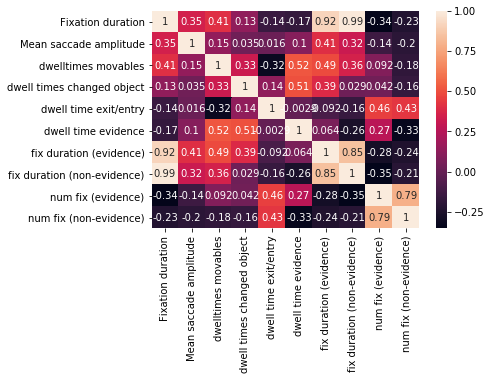

In [22]:
corr_agg = ced_blind2.corr()
sns.heatmap(corr_agg, xticklabels = corr_agg.columns, yticklabels = corr_agg.columns, annot = True)
plt.show()
plt.savefig('/Users/decio/thesis/csi_thesis/reports/figures/change.png')

In [ ]:
ced_blind = ced_blind.drop(['Participant'],axis = 1).rename(columns = {'Group': 'experience'})

In [ ]:
ced_blind.experience = ced_blind.experience.apply(str)

In [ ]:
ced_blind.info()

In [ ]:
for i in ced_blind.columns.values:
    sns.set_style('whitegrid')
    sns.boxplot(x = ced_blind[i], hue = "experience", data = ced_blind, palette = 'Set3', orient = 'v')
    sns.swarmplot(x = ced_blind[i], 
                  color = '.25',
                  data = ced_blind)
    plt.show()

In [ ]:
for i in ced_blind
ced_blind

In [ ]:
tst = sns.FacetGrid(ced_blind, col = '')

In [ ]:
ced_blind['experience'] = ced_blind.pop('experience')

In [ ]:
ced_blind.to_pickle('ced_blind.pkl')

In [23]:
ced_blind = pd.read_pickle('ced_blind.pkl')

#### 2. prediction and feature evaluation with Extratrees & Randomforrest

In [ ]:
#feature importance => RandomForest and Extratrees
ex_grid, for_grid, ex_report, for_report, feat_imp = m.ensemble_classifier(ced_blind,10)

In [ ]:
feat_imp = feat_imp.sort_values('importance', ascending = False)

In [ ]:
ex_grid

In [ ]:
%config IPCompleter.greedy=True

In [ ]:
np.mean(ex_grid.cv_results_['mean_test_score'])

In [ ]:
feat_imp.to_csv('cb_feat.csv')

In [7]:
pd.read_csv('cb_feat.csv')

,Unnamed: 0,importance
0,perc_exitentry,0.269411
1,relevant_fixdur,0.231491
2,redundant_fixnum,0.181341
3,FixDur,0.128031
4,redundant_fixdur,0.068674
5,perc_changedobject,0.055861
6,relevant_fixnum,0.026471
7,perc_moveable,0.025253
8,perc_evidence,0.013468
9,pixel,0.000000


In [ ]:
#Relative feature_importance based on extratrees
fig = plt.figure(figsize = (8,8), dpi = 80)
plt.style.use('classic')
plt.xticks(rotation = 45, size = 16)
sns.barplot(x = feat_imp.index, y = 'importance', data = feat_imp)
plt.show()

In [ ]:
feat_imp = feat_imp.sort_values('importance', ascending = False)

In [ ]:
feat_imp.reset_index().rename(columns = {'index':'feature', 'importance': 'relative importance'})

In [ ]:
feat_imp

In [ ]:
#feature importance => RandomForest and Extratrees
print('Randomforrest results, best gridsearch score:', for_grid.best_score_)
print('--------------------------')
print('Extratrees results, best gridsearch score:', ex_grid.best_score_)

In [ ]:
print(pd.DataFrame.from_dict(ex_report))
print('--------------------------')
print(pd.DataFrame.from_dict(for_report))

In [ ]:
cb_rep = pd.concat([pd.DataFrame.from_dict(ex_report) , pd.DataFrame.from_dict(for_report)]).drop(['Expert','Novice'], axis = 1)
cb_rep.reset_index(inplace = True)
cb_rep = cb_rep.rename(columns = {'index':'metric'})
cb_rep = cb_rep.drop(['weighted avg', 'micro avg'],axis = 1)
cb_rep = cb_rep[cb_rep.metric == 'f1-score']
cb_rep.reset_index(inplace = True)
cb_rep = cb_rep.drop(['index'],axis =1)

In [ ]:
cb_rep = pd.concat([cb_rep, pd.DataFrame({'model':['Extra Trees', 'Random forest']})], axis = 1, ignore_index = True)
cb_rep.columns = ['metric', 'score', 'model']

In [ ]:
cb_rep = cb_rep.drop(['metric'],axis = 1)

In [ ]:
cb_rep['fase'] = 'test'

In [ ]:
cb_rep.to_pickle('cbcb.pkl')

In [ ]:
sns.barplot(cb_rep.model, cb_rep.score, palette = 'pastel')
plt.show()

In [ ]:
cb_rep.to_pickle('cb_rep.pkl')

In [ ]:
print(ex_grid.best_params_)
print('--------------------------')
print('    ')
print('--------------------------')
print(for_grid.best_params_)

### PCAs

In [28]:
# Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Scaling the features
scaler = StandardScaler()
cb_pca_standard = scaler.fit_transform(ced_blind.iloc[:,:-1])

minmax_scaler = MinMaxScaler()
cb_pca_minmax = minmax_scaler.fit_transform(ced_blind.iloc[:,:-1])


In [ ]:
#Set the var_explained counter
var_exp = np.linspace(1,95,19)
var_exp = [int(i)/100 for i in var_exp]


# How much PCA's do we need?
# Apparentely we need 4 to capture a lot of variance

scree_plot = {}

for i in var_exp:
    pca = PCA(i) #minmax
    pca2 = PCA(i) #standard
    
    pc_mm = pca.fit_transform(cb_pca_minmax) #minmax
    pc_std = pca2.fit_transform(cb_pca_standard) #standard
    
    scree_plot[i] = {'explained_mm':sum(pca.explained_variance_ratio_) ,
                     'explained_std':sum(pca2.explained_variance_ratio_) ,
                     
                     'pca_minmax': pc_mm.shape[1],
                     'pca_std' : pc_std.shape[1],
                    }
        


In [ ]:
scree = pd.DataFrame.from_dict(scree_plot, orient = 'index').reset_index()

In [ ]:
plt.plot(scree.pca_minmax, scree.explained_std,'r', label = 'Explained variance for Standard scaled PCAs', data = scree)
plt.plot(scree.pca_minmax, scree.explained_mm, 'm', label = 'Explained variance for MinMax scaled PCAs', data = scree)
plt.title('Change blindness task')
plt.legend(bbox_to_anchor = (0.02 , 0.98), loc = 2, borderaxespad = 0)
plt.xticks(scree.pca_minmax)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.show()

## m.score_knn_cv(cols)

In [29]:
#Scaling the features
scaler = StandardScaler()
cb_pca_standard = scaler.fit_transform(ced_blind.iloc[:,:-1])

minmax_scaler = MinMaxScaler()
cb_pca_minmax = minmax_scaler.fit_transform(ced_blind.iloc[:,:-1])


In [30]:
#We concluded that 5 PCA's give us the most bang for our bucks :)
pca = PCA(n_components = 6) #minmax
pca2 = PCA(n_components = 6) #standard
    
pc_mm = pca.fit_transform(cb_pca_minmax) #minmax
pc_std = pca2.fit_transform(cb_pca_standard) #standard

In [31]:
#MinMax-scaled
columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6']
change_std = pd.concat([pd.DataFrame(pc_std, columns = columns), ced_blind[['experience']]], axis = 1)
change_mm = pd.concat([pd.DataFrame(pc_mm, columns = columns), ced_blind[['experience']]], axis = 1)

#Standard-Scaled
#change_blind

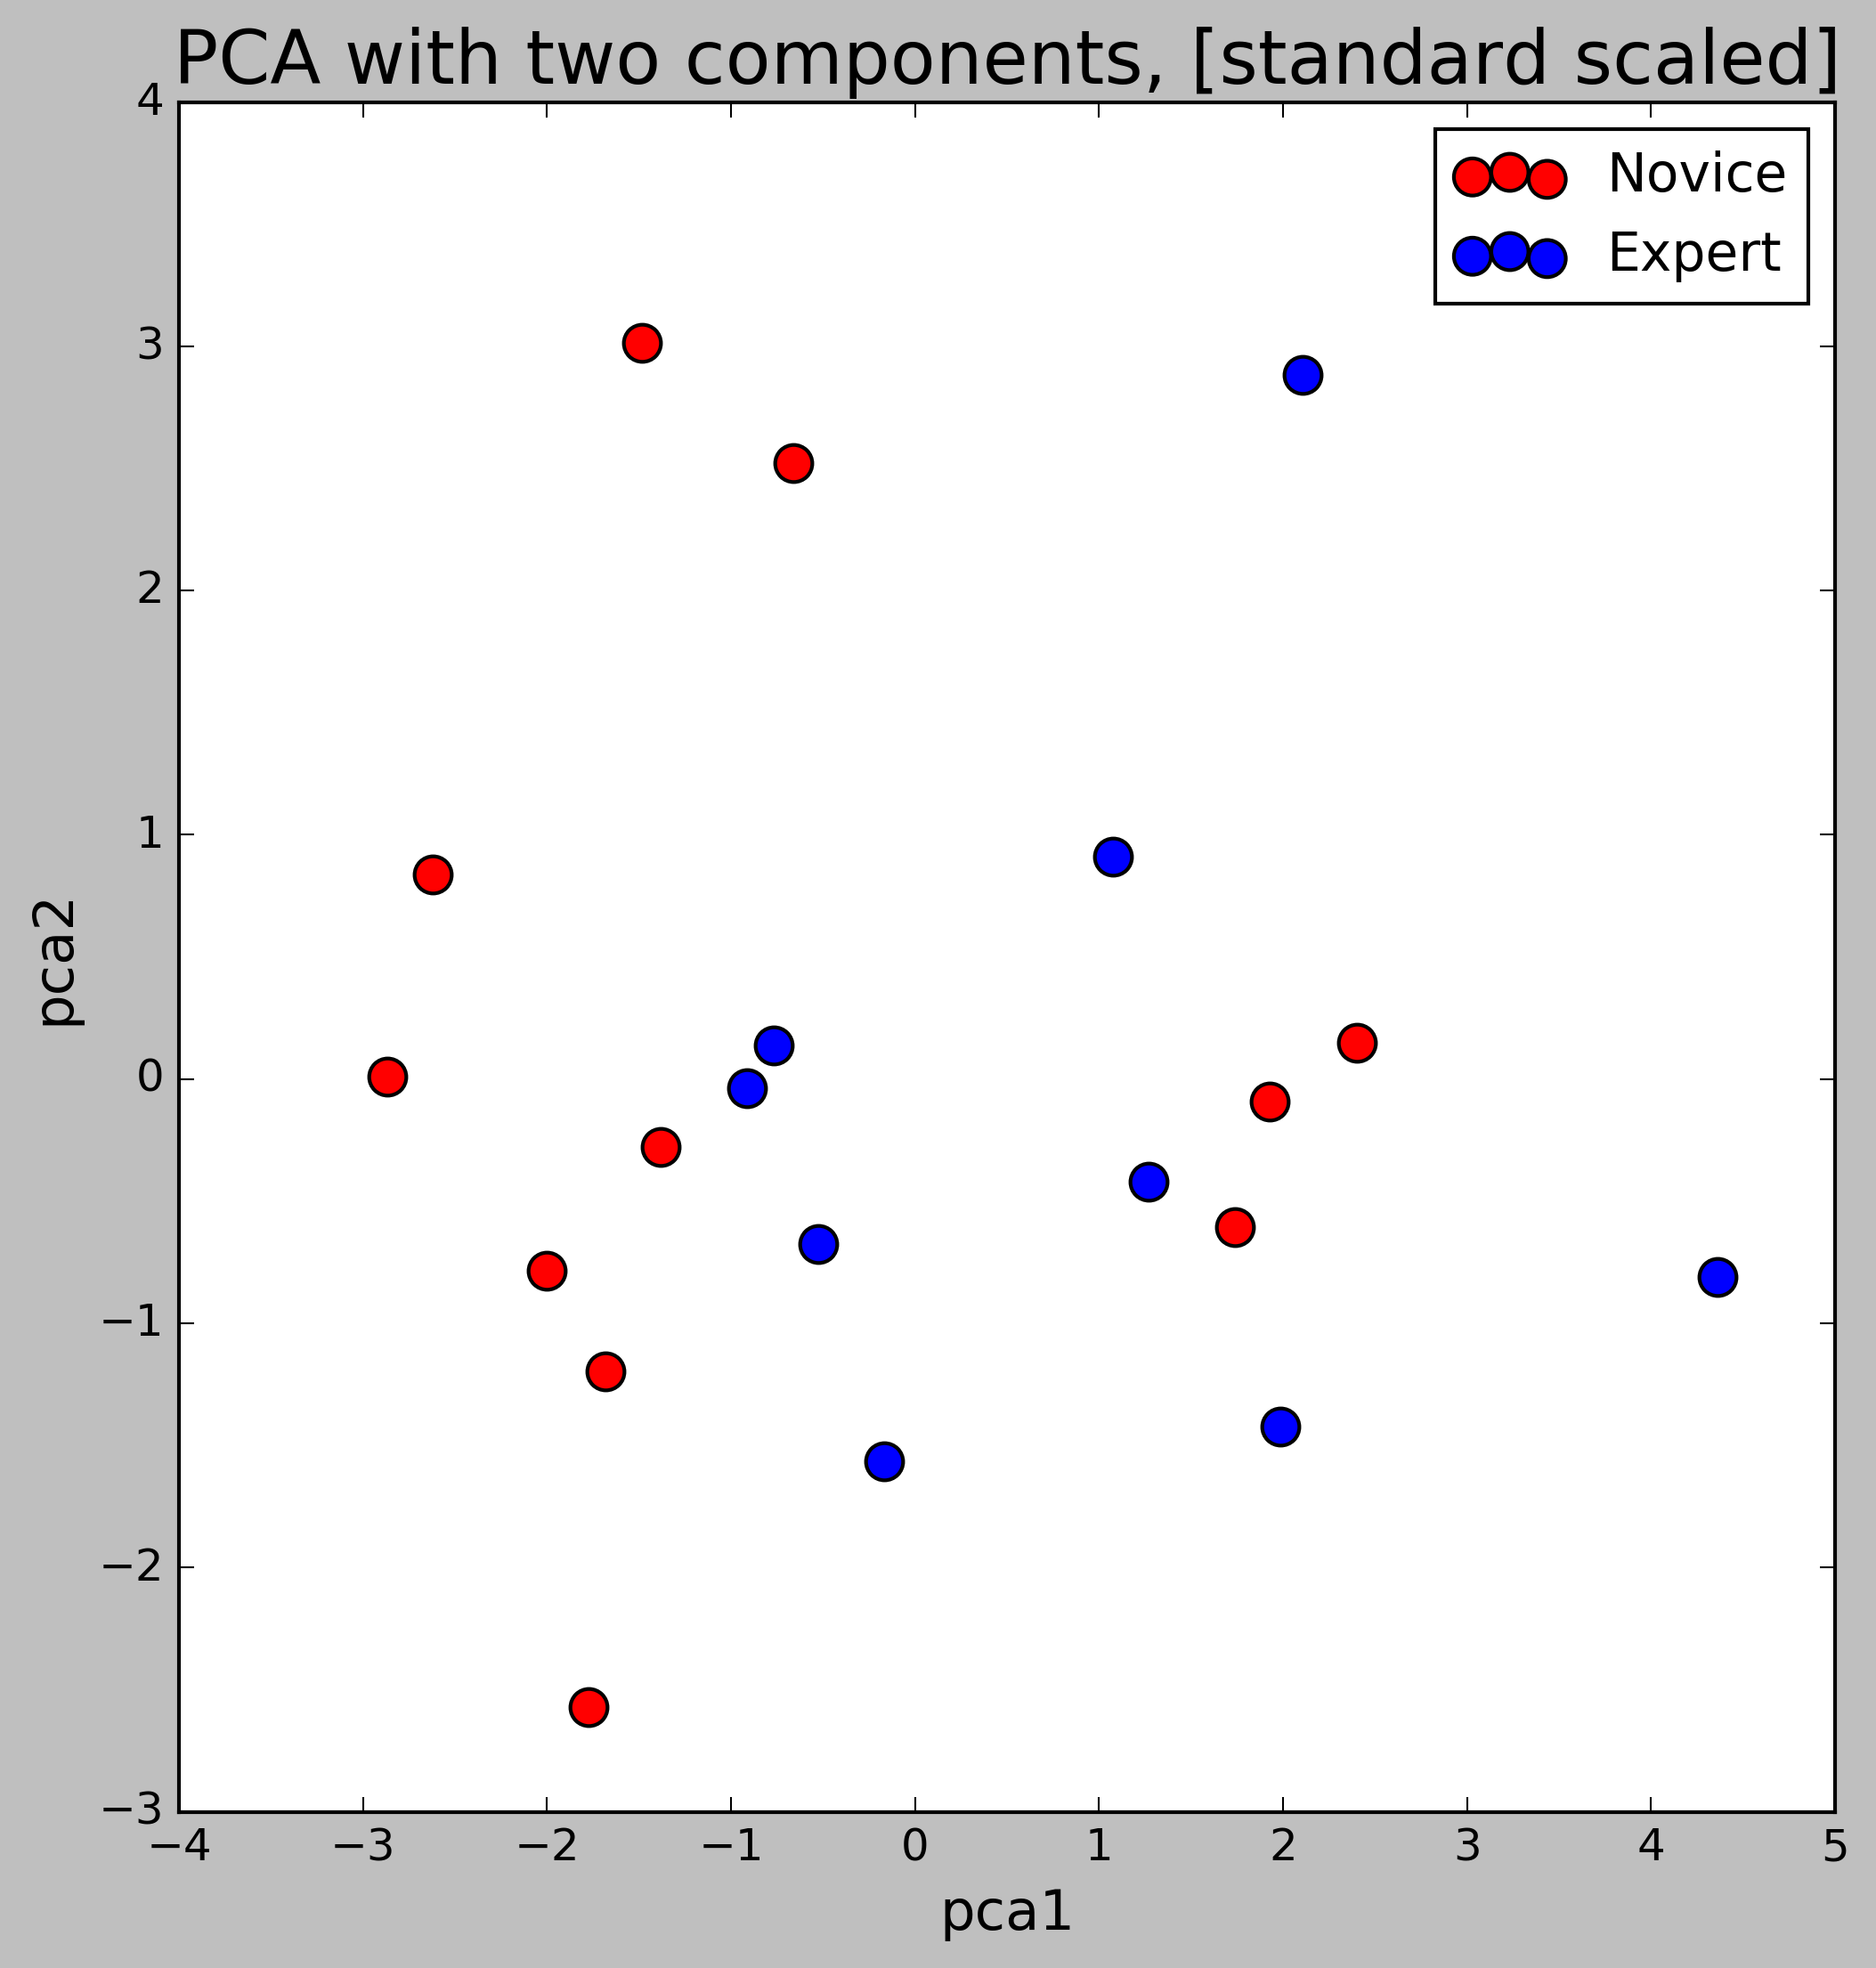

In [51]:
pca2plot(change_std, 'standard scaled')

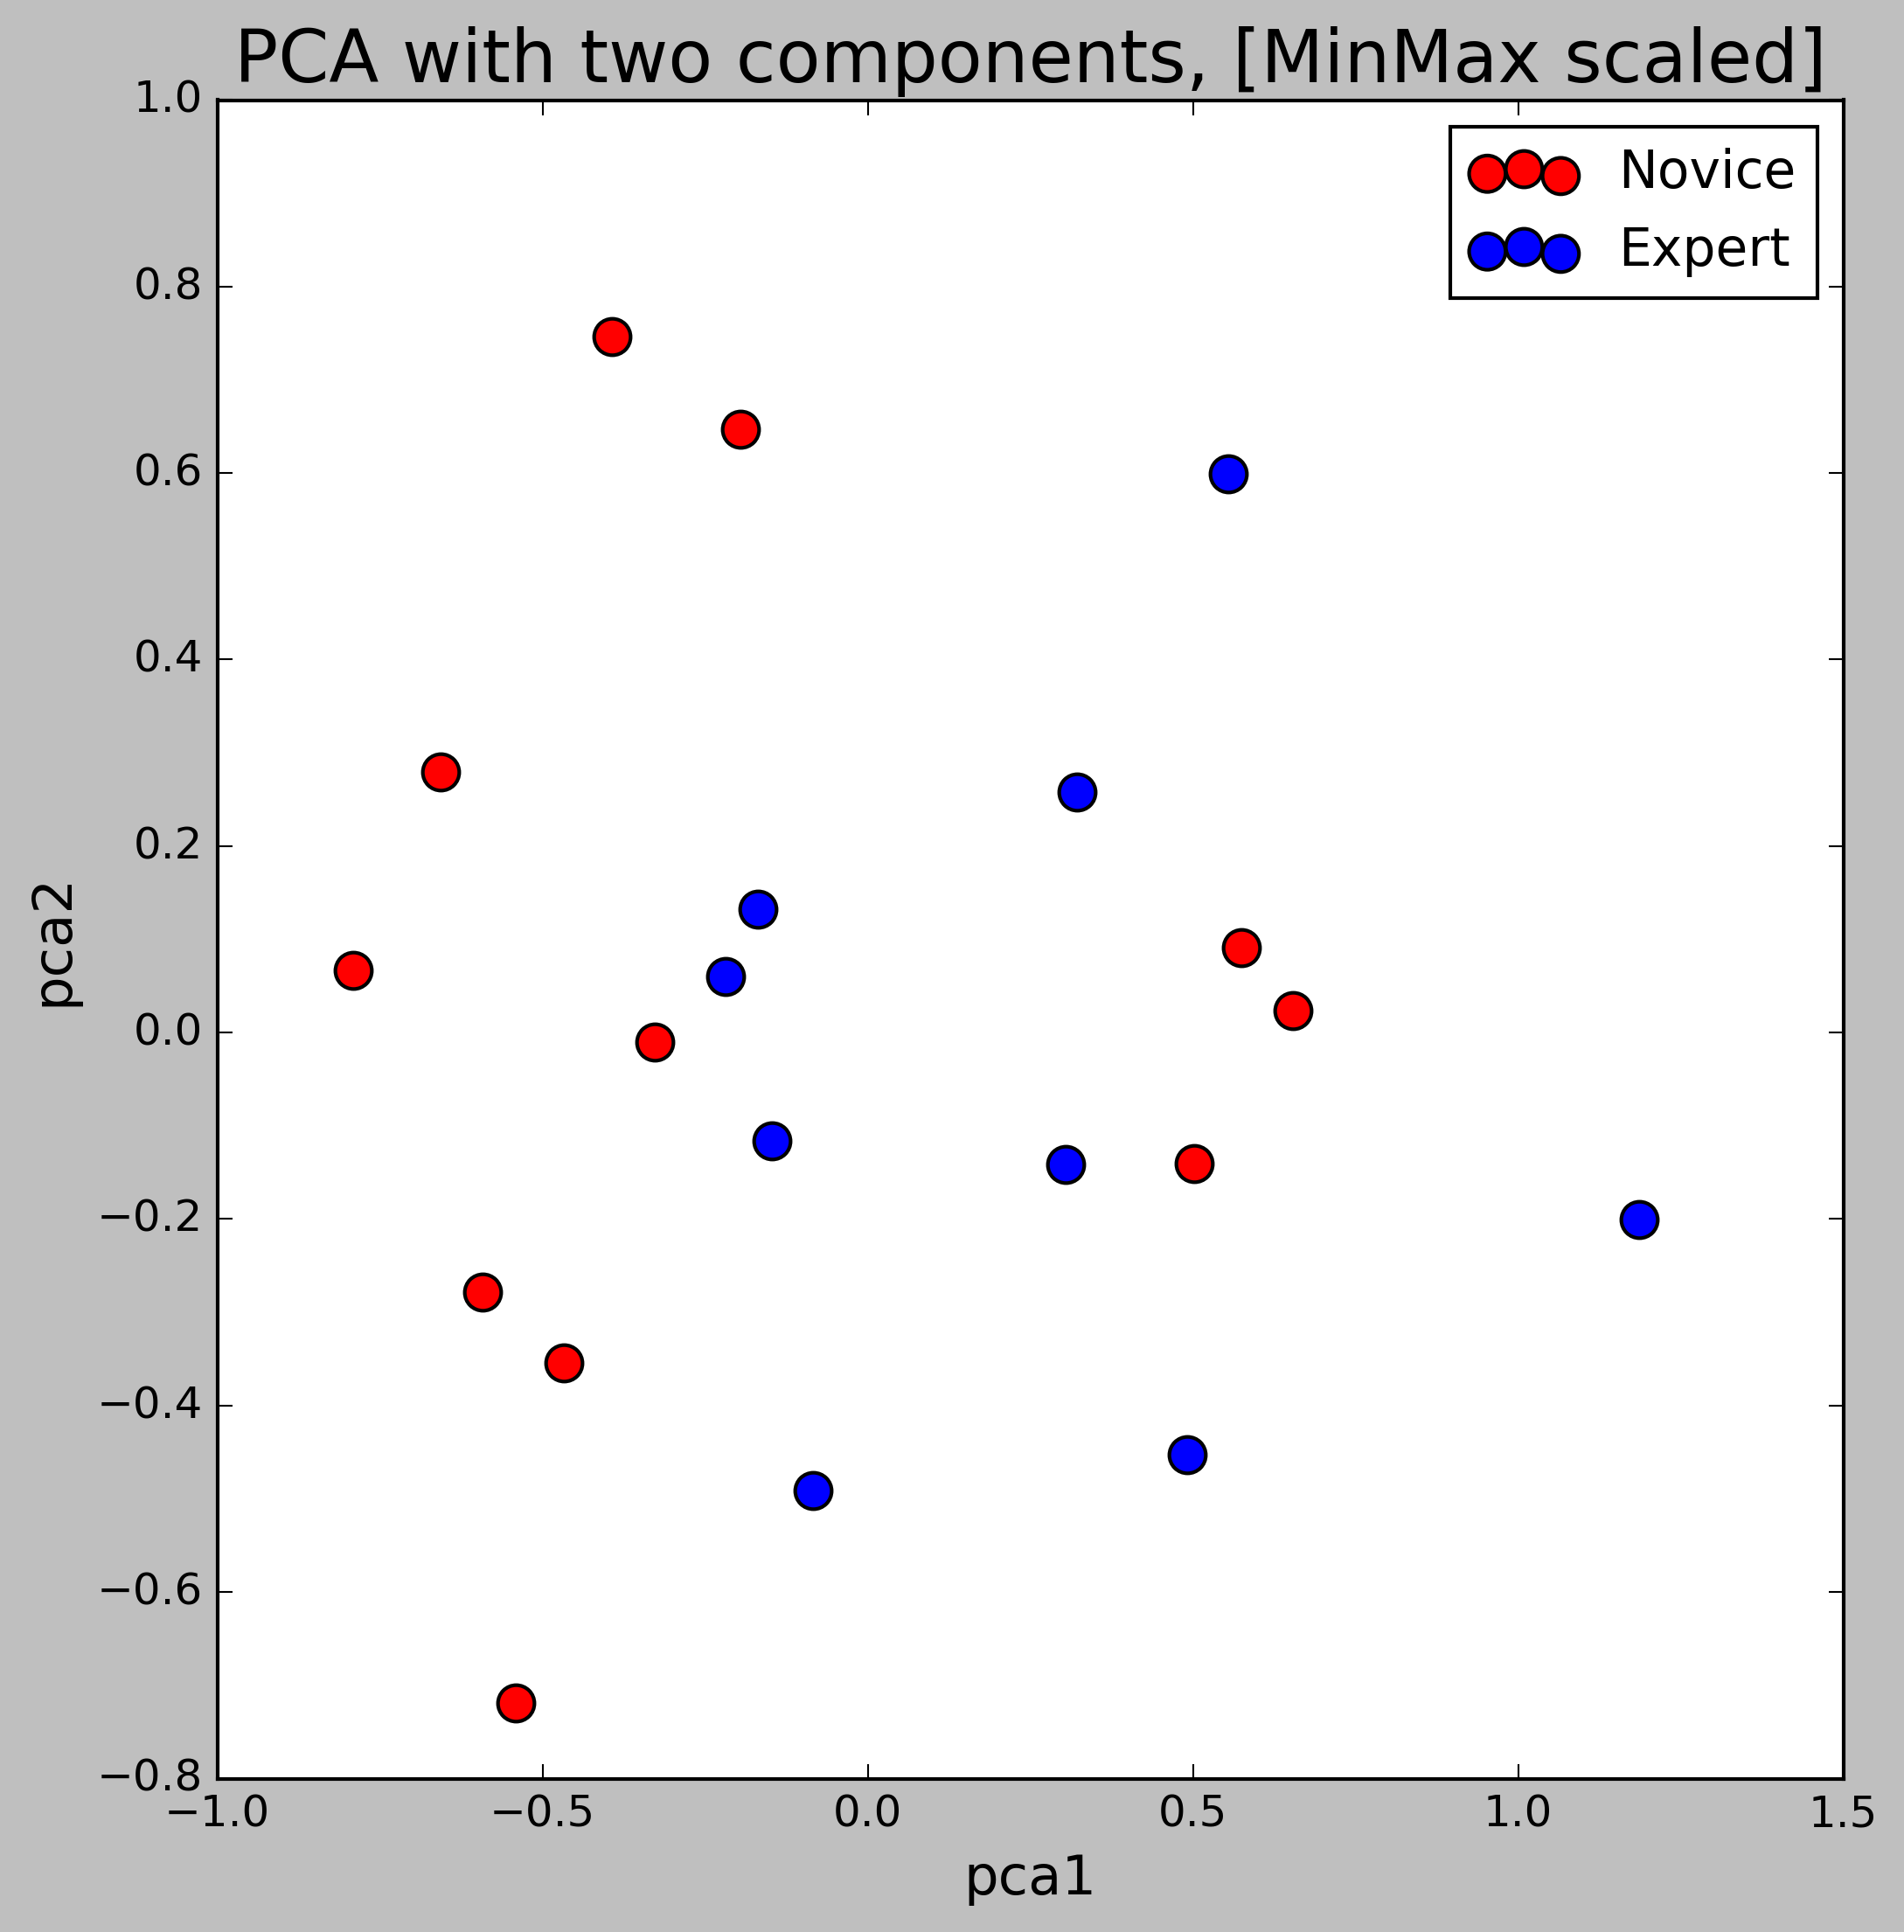

In [50]:
pca2plot(change_mm, 'MinMax scaled')

No handles with labels found to put in legend.


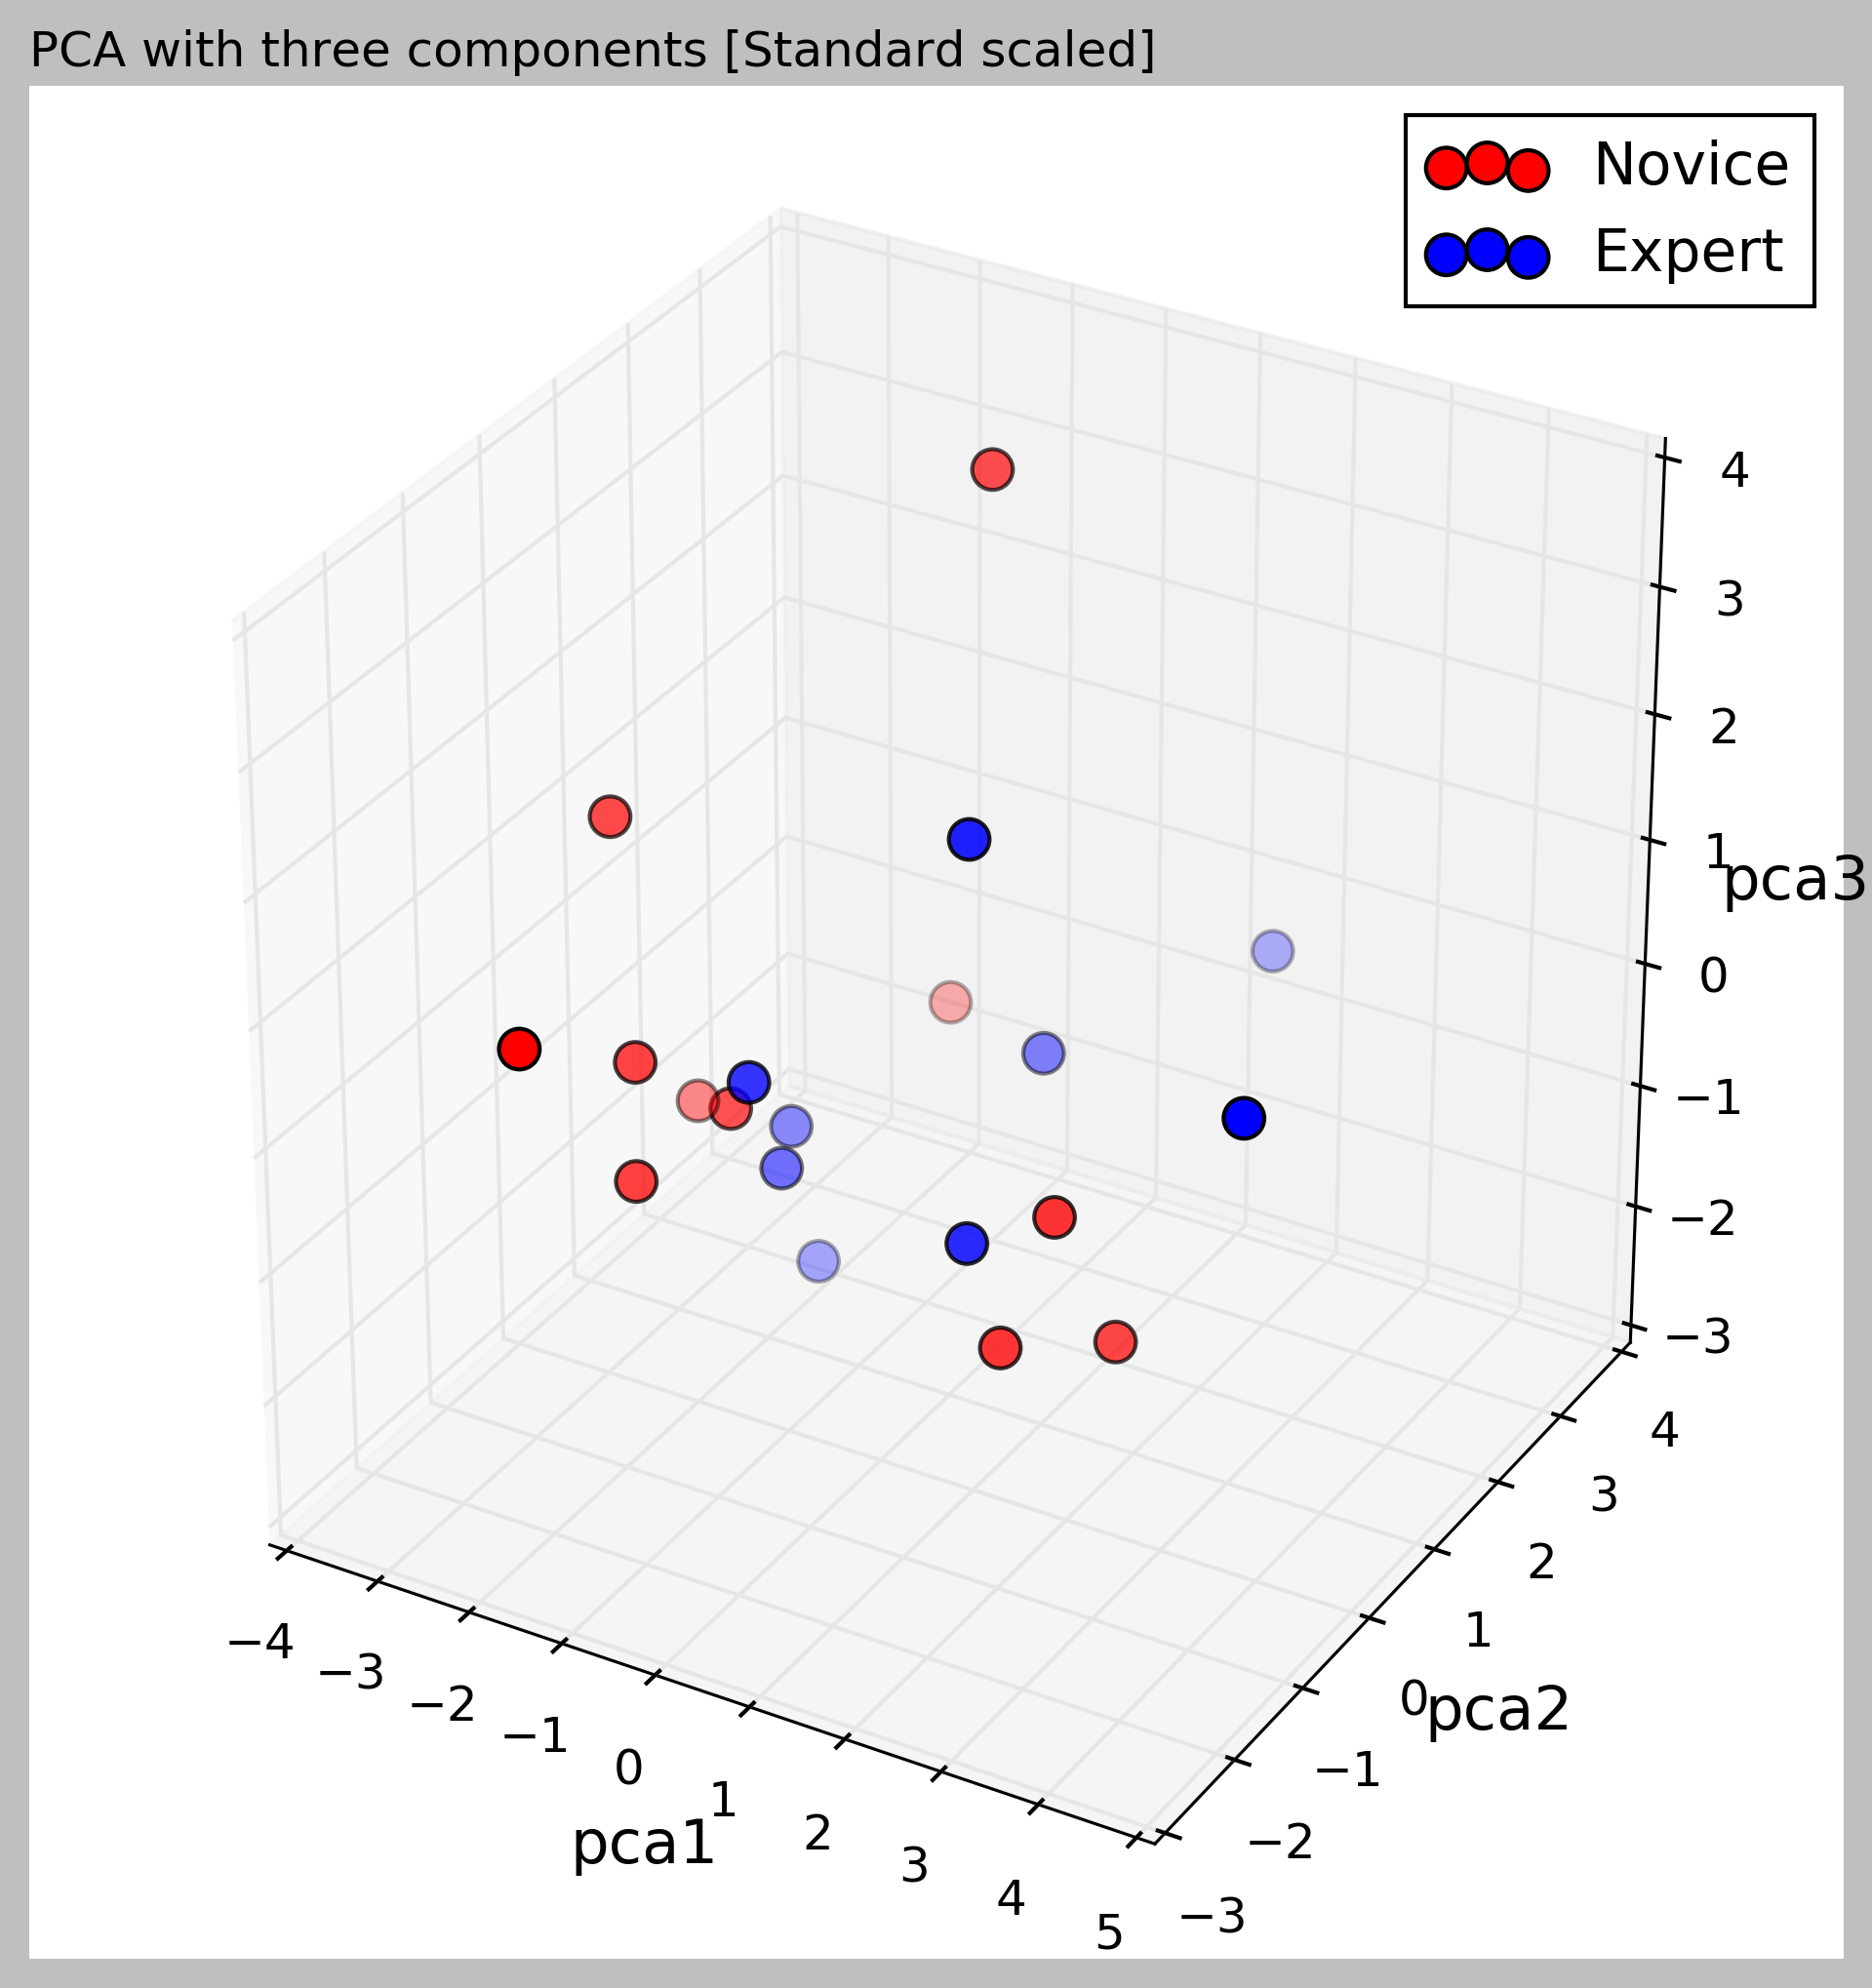

In [54]:
pcaplot(change_std, 'Standard scaled')

No handles with labels found to put in legend.


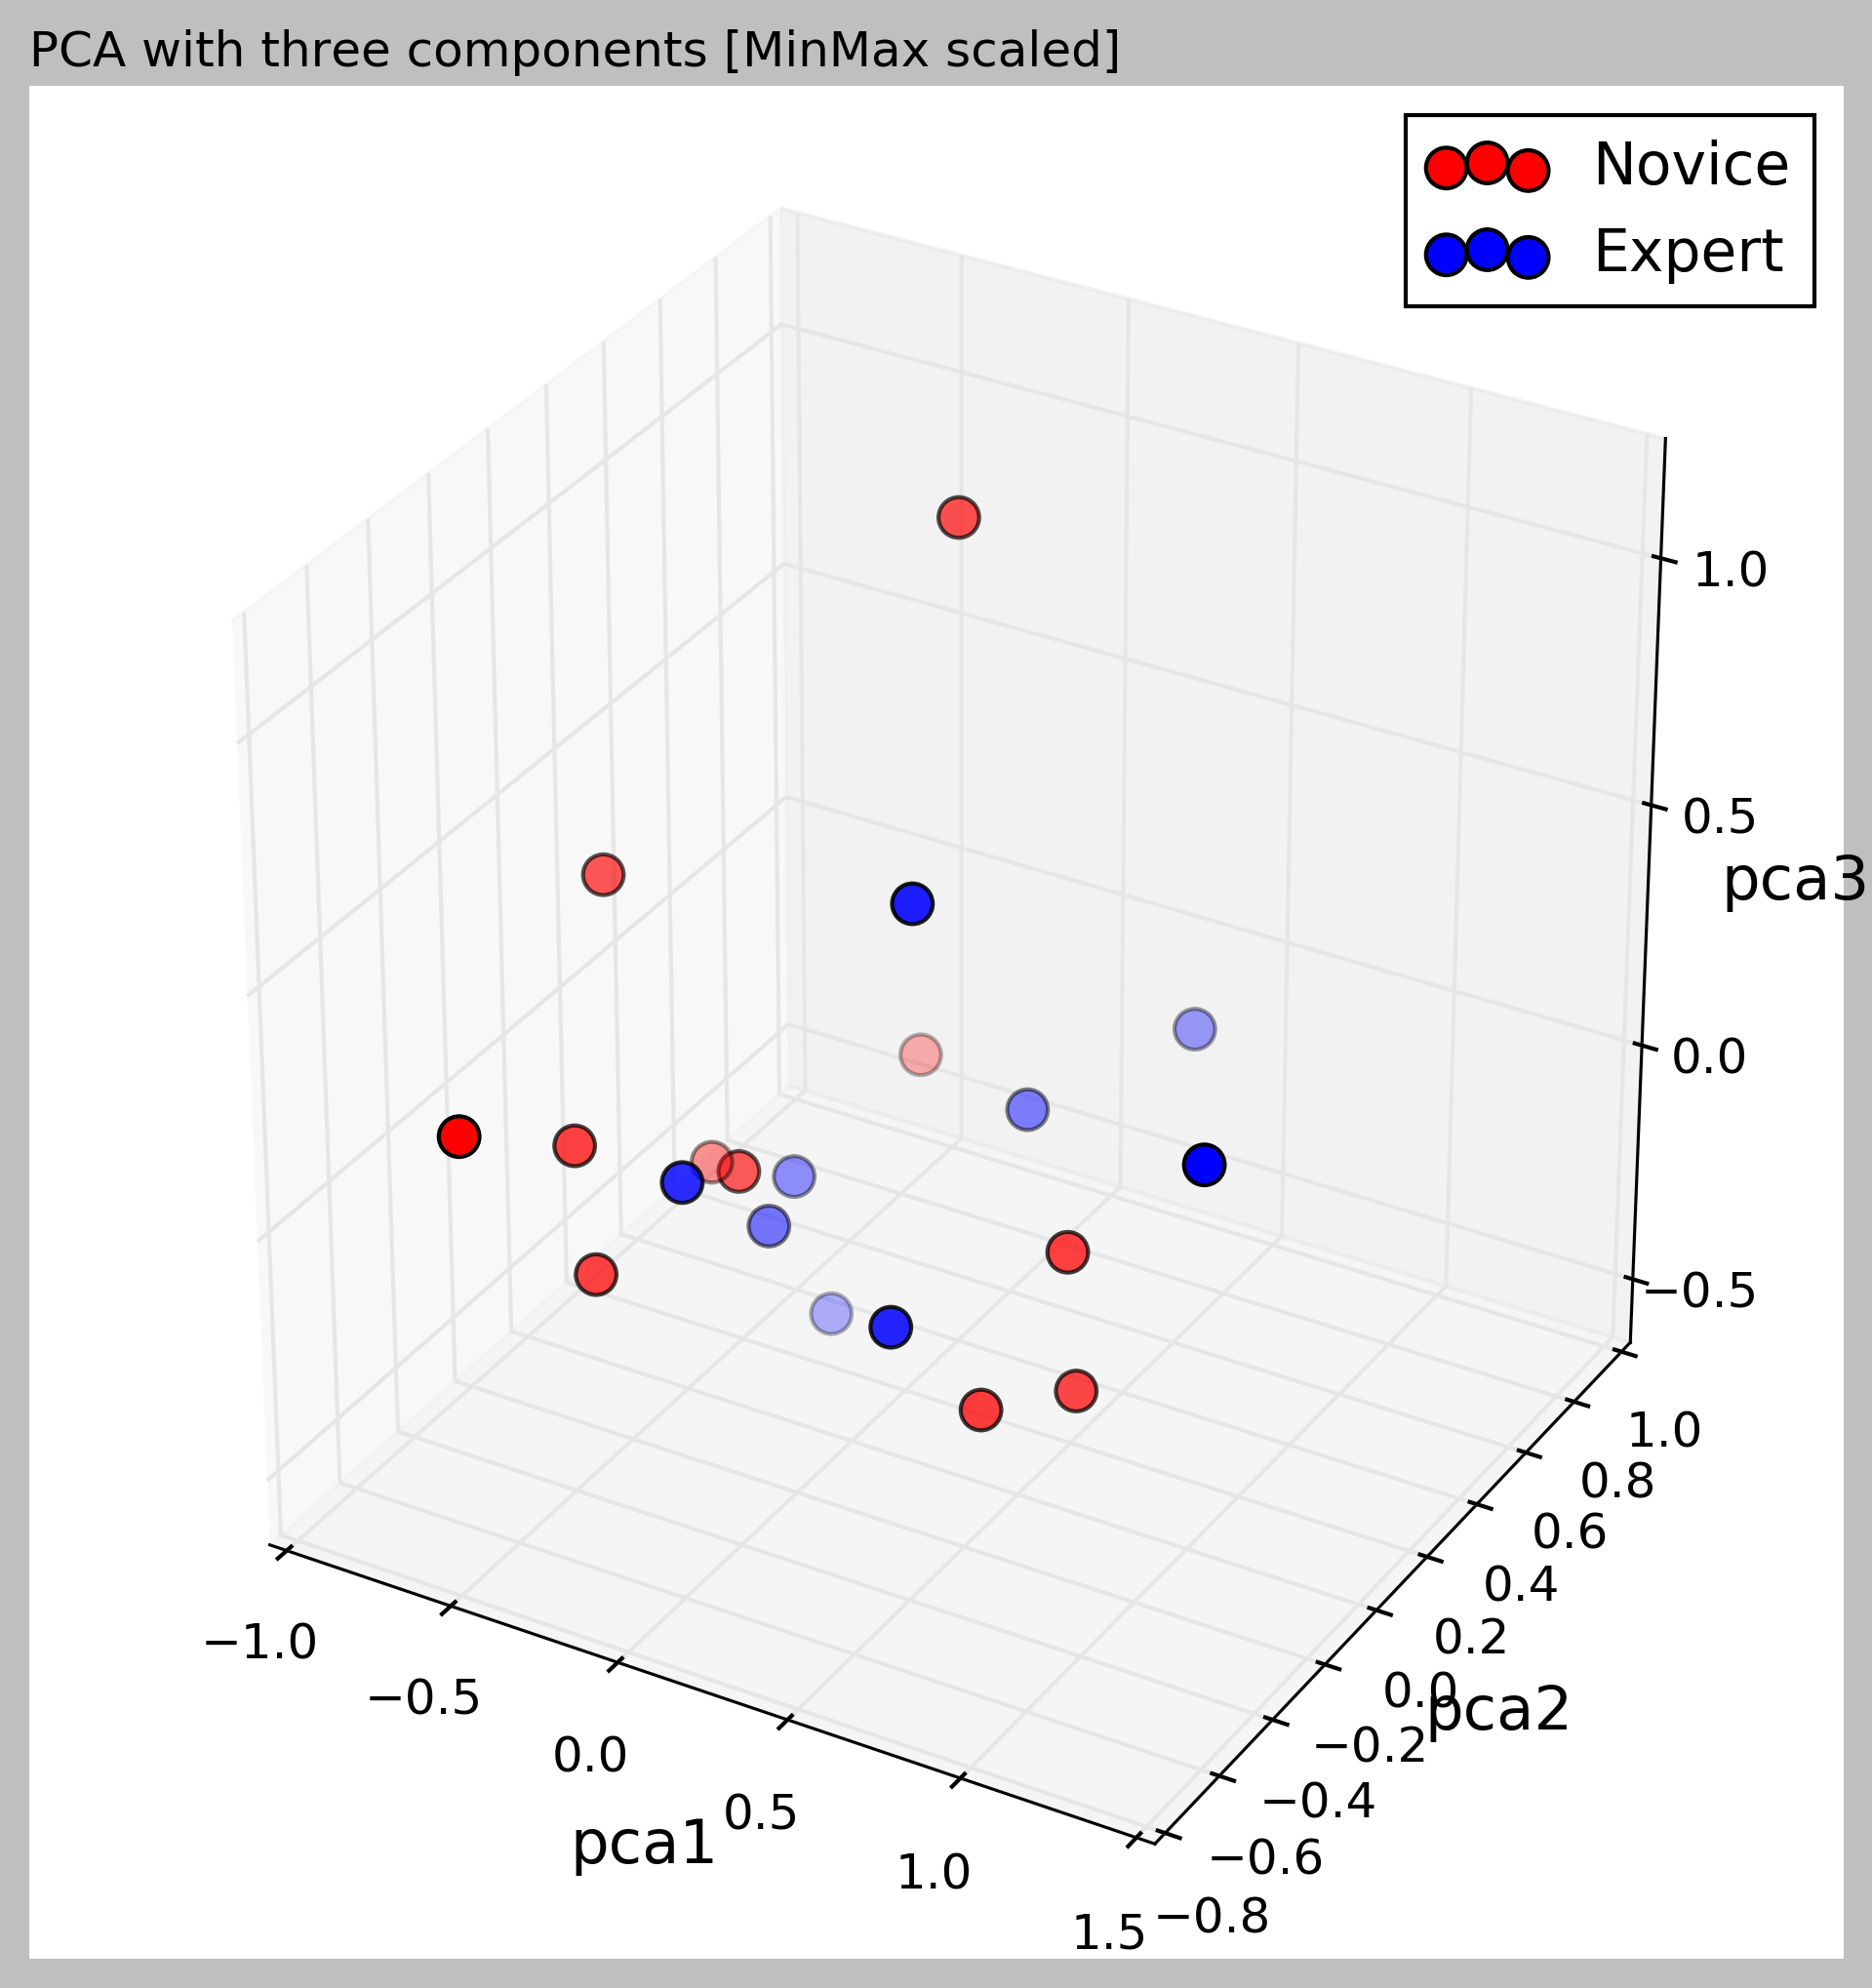

In [55]:
pcaplot(change_mm, 'MinMax scaled')

In [53]:
def pca2plot(mm_eg, scaling):

    fig = plt.figure(figsize = (8,8), dpi = 300)
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('pca1', fontsize = 15)
    ax.set_ylabel('pca2', fontsize = 15)
    ax.set_title('PCA with two components, ['+str(scaling)+']', fontsize = 20)
    targets = [1,2]
    colors = ['r', 'b']

    for target, color in zip(targets,colors):
        indicesToKeep = mm_eg['experience'] == target
        ax.scatter(mm_eg.loc[indicesToKeep, 'pca1']
                   , mm_eg.loc[indicesToKeep, 'pca2']
                   , c = color
                   , s = 100)
        ax.legend(['Novice', 'Expert'])
        ax.grid(which = 'both')
    return plt.show()


In [52]:
def pcaplot(pca_vis, scaling):
    
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    plt.style.use('classic')

    fig = plt.figure(figsize = (8,8), dpi = 300)
    ax = fig.add_subplot(111, projection = '3d') 
    ax.set_xlabel('pca1', fontsize = 15)
    ax.set_ylabel('pca2', fontsize = 15)
    ax.set_zlabel('pca3', fontsize = 15)    

    plt.title('PCA with three components ['+str(scaling)+']', fontsize = 12, loc = 'left')
    targets = [1,2]
    colors = ['r', 'b']
    plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.3)
    

    


    for target, color in zip(targets,colors):
        indicesToKeep = pca_vis['experience'] == target
    
        ax.scatter3D(pca_vis.loc[indicesToKeep,'pca1'],
                     pca_vis.loc[indicesToKeep,'pca2'],
                     pca_vis.loc[indicesToKeep,'pca3'],
                    c = color,
                    s = 100
                    )
    
        ax.legend(['Novice', 'Expert'])
        ax.grid(which = 'both')
    return plt.show()

In [1]:
cb_std_list, cb_std_best_k, cb_std_rep = m.score_knn_cv(change_std,6)

NameError: name 'm' is not defined

In [ ]:
cb_mm_list, cb_mm_best_k, cb_mm_rep = m.score_knn_cv(change_mm,6)

In [ ]:
cbst = pd.DataFrame.from_dict(cb_std_rep)
cbm = pd.DataFrame.from_dict(cb_mm_rep)

In [ ]:
pd.DataFrame(cb_mm_rep)

In [ ]:
print(cb_mm_list)
print(cb_std_list)

In [ ]:
cbst = cbst.reset_index().loc[:,['index', 'macro avg']]
cbm = cbm.reset_index().loc[:,['index', 'macro avg']]
cbst['scaling'] = 'MinMax'
cbm['scaling'] = 'Standard'
cb = pd.concat([cbst,cbm]).reset_index()
cb_kn = cb[cb['index'] == 'f1-score']

In [ ]:
cb_kn = cb_kn.drop(['level_0'],axis = 1).reset_index().drop(['level_0'],axis=1)

In [ ]:
cb_kn = cb_kn.drop(['index'], axis = 1).rename(columns = {'macro avg': 'score'})

In [ ]:
tr_st = cb_std_list.nlargest(1,'scores')
tr_m = cb_mm_list.nlargest(1,'scores')

In [ ]:
tr_m['scaling'] = 'MinMax'
tr_st['scaling'] = ' Standard'

tr_m['fase'] = 'train'
tr_st['fase'] = ' train'

In [ ]:
tr_m = tr_m.drop(['K'], axis = 1)
tr_st = tr_st.drop(['K'], axis = 1)

In [ ]:
tr = pd.concat([tr_m, tr_st]).reset_index().drop(['index'], axis = 1)

In [ ]:
cb_kn.info()

In [ ]:
tr2

In [ ]:
tr2 = pd.DataFrame({'scores': [0.2,0.2,0.125,0.125],
                    'scaling': ['MinMax', 'Standard', 'MinMax','Standard'], 
                    'fase': ['train', 'train','test','test']})

In [ ]:
tr2.to_csv('knn_cb.csv')

In [7]:
pd.read_csv('knn_cb.csv').drop(['Unnamed: 0'], axis = 1)

,fase,scaling,scores
0,train,MinMax,0.200
1,train,Standard,0.200
2,test,MinMax,0.125
3,test,Standard,0.125


In [ ]:
cb_kn = cb_kn.reset_index().drop(['index'], axis =1)

In [ ]:
cb_kn['fase'] = 'test'

In [ ]:
cb_kn.rename(columns = {'score': ' scores'}, inplace = True)

In [ ]:
sns.barplot(cb_kn['scaling'], cb_kn['macro avg'], palette = 'pastel')
plt.show()

In [ ]:
cb_mm_list

In [ ]:
print(cb_std_list)
print('--------')
print()
print(pd.DataFrame.from_dict(cb_std_rep))

In [ ]:
cb_mm_rep

In [ ]:
print(cb_mm_list)
print('--------')
print(pd.DataFrame.from_dict(cb_mm_rep))

In [ ]:
#Results KNN on change_blindness

In [ ]:
cb_mm_list

In [ ]:
cb_std_list

In [ ]:
fig = plt.figure(figsize = (8,6), dpi = 80)
plt.plot(k_range, cb_mm_list.scores,'b', label = 'Accuracy per K for MinMAX scaled PCAs',data = cb_mm_list)
plt.plot(k_range, cb_std_list.scores, 'm', label = 'Accuracy per K for standard scaled PCAs', data = cb_std_list)
plt.grid()
plt.title('Accuracy per K for Changeblind', size = 14)
plt.legend(bbox_to_anchor = (0.02 , 0.98), loc = 2, borderaxespad = 0)
plt.yticks(size = 14)
plt.xticks(k_range, size = 14)
plt.xlabel('Value of K', size = 14)
plt.ylabel('Accuracy scores', size = 14)
plt.show()

In [ ]:
#Import change_blindness dataset

In [ ]:
for i in enumerate(change_blind.columns):
    print(i)

In [ ]:
path = '/Users/decio/thesis/csi_thesis/data/processed/'

In [ ]:
allfiles = glob.glob(path + '/*.csv')

In [ ]:
allfiles

In [ ]:
#Make a new dictionary of dataframes
file_dict = {}
for file in allfiles:
    file_dict[file] = pd.read_csv(file)

In [ ]:
for i in file_dict.keys():
    print(file_dict['/Users/decio/thesis/csi_thesis/data/processed/image1.csv'])

In [ ]:
#rename the key values in the dictionary
# and turn it into integers
file_dict2 = {}
for i in file_dict.keys():
    file_dict2[int(i.strip('/Users/decio/thesis/csi_thesis/data/processed/image/csv.'))] = file_dict[i]

In [ ]:
file_dict2.keys()

In [ ]:
#check how much columns we need
for i in enumerate(file_dict2[1].columns):
    print(i)

In [ ]:
for i in file_dict2.keys():
    file_dict2[i] = file_dict2[i].drop(['Unnamed: 0','ROI'], axis = 1)
    file_dict2[i] = file_dict2[i][np.abs(stats.zscore(file_dict2[i].FixDur)) < 2] # here we only keep the fixation durations that are within twice the standard deviation

In [ ]:
for i in file_dict2.keys():
    file_dict2[i] = compute_rel_red_cols(file_dict2[i])

In [ ]:
for i in file_dict2.keys():
    file_dict2[i] = file_dict2[i].rename(columns = {'experience_x':'experience'})
    file_dict2[i]['experience'] = file_dict2[i].pop('experience')

In [ ]:
with open('file.txt', 'wb') as handle:
    pickle.dump(file_dict2, handle)

In [ ]:
file_dict2[1].groupby('experience').mean()
#file_dict2[1].groupby('experience').std()

In [ ]:
one = file_dict2[1]
five = file_dict2[5]

In [ ]:
one.to_csv('one.csv')
five.to_csv('five.csv')

In [ ]:
sns.barplot(one.experience, one.relevant_fixdur, ci = 'sd' ,palette = 'pastel', data = one)
#sns.barplot( )
plt.show()

#### 2. Local feature analysis

In [ ]:
total_df = {}
for i in file_dict2.keys():
    print('Image',i)
    a, b = m.feat_plot(file_dict2[i], 4, 'Local feature importance')
    total_df[i] = a

In [ ]:
localimp = pd.concat(total_df).reset_index() #.pivot(columns = 'level_1', values = 'importance')

In [ ]:
localimp = localimp.rename(columns = {'level_0':'image', 'level_1': 'measure'})

In [ ]:
localimp.nlargest(5,'importance')

In [ ]:
localimp.head()

In [ ]:
localimp.groupby(['image','measure']).apply(sort_values(ascending = False))

In [ ]:
localimp = localimp[localimp.image != 4]

In [ ]:
imp_dict = m.create_dict(localimp, 'image')

In [ ]:
localimp.to_csv('localcb.csv')

In [14]:
pd.read_csv('localcb.csv').drop(['Unnamed: 0'], axis = 1)

,image,measure,importance
0,1,relevant_fixdur,0.066929
1,1,redundant_fixdur,0.124763
2,1,relevant_fixnum,0.677180
3,1,redundant_fixnum,0.131127
4,2,relevant_fixdur,0.151242
5,2,redundant_fixdur,0.403105
6,2,relevant_fixnum,0.044658
7,2,redundant_fixnum,0.400995
8,3,relevant_fixdur,0.319207
9,3,redundant_fixdur,0.276504


In [ ]:
for i in imp_dict.keys():
    imp_dict[i].to_csv('impimage'+ str(i)+'.csv')

In [ ]:
sns.barplot(localimp.image, y = 'importance', hue = 'measure', data = localimp)
plt.show()

In [ ]:
imp_images = [1,13, 6, 7] 

In [ ]:
for i in imp_images:
    scores = output(ensemble_classifier(file_dict2[i],4)) # train on 4

In [ ]:
ex_grid_1, for_grid_1, ex_report_1, for_report_1, feat_imp_1 = m.ensemble_classifier(file_dict2[1],4)

In [ ]:
test = file_dict2[1]

In [ ]:
a, b, c, d, e = m.ensemble_classifier(test,4)

In [ ]:
pd.DataFrame({'b':[1,2,3], 'c':[4,5,6]})

In [ ]:
#Let's classify this whol`be thing
score_im = {}
for i in file_dict2.keys():
    if i != 4:
        a,b,c,d,e = ensemble_classifier(file_dict2[i],4)
        score_im[i] = output(a,b,c,d,e,i)
    else:
        pass

In [ ]:
change_scores = pd.concat(score_im)

In [ ]:
change = change_scores.iloc[:,:-2].reset_index().drop(['level_0','level_1'], axis = 1)

In [ ]:
change['f1_score_forest'] = change.pop('f1_score_forest')
change['image'] = change.pop('image')

In [ ]:
# local scores per image

In [ ]:
change = change.round(2)

In [ ]:
change.to_csv('cblocal.csv')

In [ ]:
change.columns = ['Extra Trees Train', 'Extra Trees Test', 'Random Forest Train', 'Random Forest Test', 'image']

In [ ]:
# for comparison plots

In [ ]:
cm = ced_blind.iloc[:,-5:]

In [ ]:
cm.columns.values

In [ ]:
cm.columns =  ['evidence','non evidence', ' evidence', ' non evidence', 'experience']





In [ ]:
cm11 = pd.melt(cm[cm.experience == 1]).iloc[0:44,:]
cm11['experience'] = 1
cm11.columns = ['measure', 'value', 'experience']

In [ ]:
cm22 = pd.melt(cm[(cm.experience == 2)]).iloc[0:36,:]
cm22['experience'] = 2
cm22.columns = ['measure', 'value', 'experience']

In [ ]:
cm = pd.concat([cm11,cm22]).reset_index().drop(['index'], axis = 1)

In [ ]:
cm = cm.replace([1,2],['novice', 'expert'])
cm.to_csv('ced.csv')

In [ ]:
#reshape for plotting
ced = m.create_dict(change, 'image')

def plottable_df(df, col, i):
    test = df[df[col] == i]
    test2 = pd.melt(test)
    test3 = test2.iloc[:4,]
    test4 = pd.concat([test3,pd.DataFrame({'image': [i,i,i,i]})], axis =1).reset_index()
    return test4


In [ ]:
for i in ced.keys():
    ced[i] = plottable_df(ced[i], 'image', i)

In [ ]:
# drop irrelevant levels
ced = pd.concat(ced).reset_index().drop(['level_0', 'level_1', 'index'], axis = 1)
ced.columns = ['measure', 'score', 'image']

In [ ]:
ced.to_csv('change.csv')

In [ ]:
loc_eye =pd.read_csv('loc_eye.csv')

In [ ]:
loc_eye = loc_eye.drop(['Unnamed: 0'], axis = 1)

In [ ]:
imeye = loc_eye

In [ ]:
imeye = m.create_dict(imeye, 'image')

In [ ]:
## crime scene inspection dataset
for i in imeye.keys():
    imeye[i] = plottable_df(imeye[i], 'image', i)

In [ ]:
imeye2 = pd.concat(imeye).reset_index().drop(['level_0', 'level_1', 'index'],axis = 1)

In [ ]:
imeye2.columns = ['model', 'score', 'image']

In [ ]:
imeye2.to_csv('csi_im.csv')

In [ ]:
# descriptives about the images

In [ ]:
ch = change_scores.reset_index().drop(['image', 'important_feature', 'important_feature_value', 'level_1'], axis = 1)

In [ ]:
ch['f1_score_fost'] = ch.pop('f1_score_forest')

In [ ]:
b = ch.describe().drop(['level_0'], axis = 1)

In [ ]:
b2 = b.T.loc[:,['mean', 'std']]

In [ ]:
b2['std'] = b2['std'] * 2

In [ ]:
b2 = b2.reset_index()

In [ ]:
b2.rename(columns = {'index':'performance'}, inplace = True)

b2.replace(['extratrees_model_best', 'f1_score_extra', ])

In [17]:
## Overall score on images
b2

NameError: name 'b2' is not defined

In [ ]:
change_scores.groupby(['important_feature']).mean()

In [ ]:
np.sqrt(1284)

In [ ]:
change_scores2.drop(['important_feature_value'], axis =1)

In [ ]:
for x, image, in enumerate(change_scores2.image.value_counts().index.values):
    data = change_scores2[(change_scores2['image'] == image)]
    data = change_scores2.groupby([''])

In [ ]:
cols = change_scores2.image.value_counts().shape[0]

In [ ]:
# Testing random_states

In [ ]:
file_dict2[1].iloc[:,:4].head()

In [ ]:
output(a,b,c,d,e,5)

In [ ]:
def compute_rel_red_cols(df):
    
    
    parts = pd.DataFrame({ 'Participant':list(set(df.Participant))})
    
    # Mean of relevant Fixdur
    relevant_FixDur = df[df.Evidence == 'Yes'].groupby(['Participant']).mean().rename( columns = {'FixDur': 'relevant_fixdur'})

    #Mean of irrelevant FixDUr
    redundant_FixDur = df[df.Evidence != 'Yes'].groupby(['Participant']).mean().rename(columns = {'FixDur': 'redundant_fixdur'})
    
    #number of relevant fixations, Here we drop evidence because for some reason counting stays in our dataframe
    relevant_nr_fix = df[df.Evidence == 'Yes'].groupby(['Participant']).count().drop(['Evidence'],axis =1).rename(columns = {'FixDur': 'relevant_fixnum' })
    
    
    #number of irrelevant fix|ations
    redundant_nr_fix = df[df.Evidence != 'Yes'].groupby(['Participant']).count().drop(['Evidence'],axis =1).rename( columns = {'FixDur': 'redundant_fixnum'})


    dfs = [relevant_FixDur,redundant_FixDur, relevant_nr_fix,redundant_nr_fix] # everything into a list of dfs to speed things up including participants
    
    for j in dfs:
        j = j.reset_index(inplace = True)  #reset index so we get 'Participant as a column'
    
    dfs.append(parts)
    
    df2 = reduce(lambda left,right: pd.merge(left,right,on = 'Participant'), dfs).drop(['index'], axis =1) # concatenate all the DF's
    
    df2 = df2.T.drop_duplicates().T #.drop(['image_scene_x'],axis = 1)
    #df2.experience_x = df2[['experience']].astype(int)
    #df2.rename( columns = {'experience': 'experience'})
    #df2.experience = df2.experience.replace(['FirstYear','Control','ThirdYear'],['Novice','Novice', 'CSI'])
    
    df2 = df2.drop(['Participant'], axis= 1)
                
    return df2
                
                
                

In [ ]:
def output(a,b,c,d,e,i):
    import pandas as pd
    output = pd.DataFrame({
                'image': [i],
               'extratrees_model_best': a.best_score_, 
              'forest_model_best': b.best_score_, 
              'f1_score_extra': [pd.DataFrame.from_dict(c['weighted avg'],
                                                       'index').loc['f1-score'].values[0]],
              'f1_score_forest': [pd.DataFrame.from_dict(d['weighted avg'], 
                                                       'index').loc['f1-score'].values[0]], 
              'important_feature':[e.reset_index().nlargest(1,'importance').rename(columns = {'index':'feature'}).values[0,0]],
             'important_feature_value': [e.reset_index().nlargest(1,'importance').rename(columns = {'index':'feature'}).values[0,1]]})
    return output



In [ ]:
def output_knn( )

In [ ]:
def ensemble_classifier(df,cols):
    
    """
    This function takes a dataframe and columns and performs a double stratified gridsearch cross validation with a
    RandomForest and an ExtraTree classifier. And uses the best performing estimator setting to predict and output
    two classification reports and two gridsearch objects for each classifier.    
    """
    
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
    from sklearn.metrics import classification_report
    from sklearn.model_selection import StratifiedKFold
    from sklearn.model_selection import GridSearchCV
    from sklearn import metrics
    import pandas as pd
    import numpy as np
    
    rs = 2018 #Randomstate    
    
    #Divide in predictors and variables
    X = df.iloc[:,:cols] #all features except for Participantnumber
    y = df.loc[:,'experience']
    
    
    #Feature importance
    clf_imp = ExtraTreesClassifier(random_state = 2018)
    clf_imp.fit(X,y)
    
    importances = clf_imp.feature_importances_
    
    
    impo = {}
    for i,j in zip(clf_imp.feature_importances_, df.iloc[:,:cols].columns):
        impo[j] = i
        
    impo_rf = pd.DataFrame.from_dict(impo, orient = 'index')
    impo_rf.rename(columns = {0:'importance'}, inplace = True)
    
    
    
    
    #Divide in train and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = rs)
    
    
    #Defining our gridsearch parameters
    vife_ints = np.linspace(2,6,5).astype(int) # Create an array with 2 to 6 as grids to be searched
    
    
    param_grid_extra = {
    'max_depth':(vife_ints),
    'min_samples_split': (vife_ints),
    'min_samples_leaf' : (vife_ints),
    'max_features': ['auto', 'sqrt', 'log2']}
    
    #Feature importance of the dataframe
    
    
    
    #assign the tree_model and train
    clf_ens = ExtraTreesClassifier(bootstrap = True, oob_score = True, random_state = rs, verbose =1)
    grid_clf_ens = GridSearchCV(clf_ens, param_grid = param_grid_extra , cv = StratifiedKFold(n_splits = 2, shuffle = True, random_state = rs)).fit(X_train, y_train)
    
    #assign the forrest_model and train
    clf_for = RandomForestClassifier(bootstrap = True, oob_score = True, random_state = rs, verbose = 1)
    grid_clf_for = GridSearchCV(clf_for, param_grid = param_grid_extra , cv = StratifiedKFold(n_splits = 2, shuffle = True, random_state = rs)).fit(X_train, y_train)
        
    
    #Feature importance for tree model
    #importances = clf_ens.feature_importances_
    #oob_score = clf_ens.oob_score_
    
    #Feature importance for rf model
    #importances_for = clf_for.feature_importances_
    #oob_score_for = clf_for.oob_score_
    
    #predictions and classification_report
    y_pred = grid_clf_ens.best_estimator_.predict(X_test)
    y_hat_forest = grid_clf_for.best_estimator_.predict(X_test)
    
    
    #classification report
    class_rep_ens = classification_report(y_test, y_pred,
                          labels = [1,2], target_names = ['Novice', 'Expert'],
                         output_dict = True)
    
    class_rep_for = classification_report(y_test, y_hat_forest,
                          labels = [1,2], target_names = ['Novice', 'Expert'],
                         output_dict = True)    
    

    return grid_clf_ens, grid_clf_for, class_rep_ens, class_rep_for, impo_rf
